## Import Modules

In [0]:
import numpy as np                     # array goodnes
from pandas import DataFrame, read_csv # excel for python
from matplotlib import pyplot as plt   # plotting library
from pandas import DataFrame, read_csv # excel for python
from keras.utils import get_file       # handy function to download data

%matplotlib inline

def plot_decision_surface(CLF, df, labels, axes, plot_step=1e-1):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder().fit(labels.reshape(-1))
    fig, axs = plt.subplots(len(axes), len(axes), figsize=(12, 12))
    for idx in range(len(axes)):
        for idy in range(len(axes)):
            ax = axs[idy][idx]
            if idx == 0: ax.set_ylabel(axes[idy])
            if idy == len(axes)-1: ax.set_xlabel(axes[idx])
            if idx == idy: continue
            x_label, y_label = axes[idx], axes[idy]
            x, y = df[x_label], df[y_label]
            _clf = CLF()
            _clf.fit(np.column_stack([x, y]), labels)
            xx, yy = np.meshgrid(np.arange(np.min(x)-1, np.max(x)+1, plot_step),
                                 np.arange(np.min(y)-1, np.max(y)+1, plot_step))
            Z = _clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = le.transform(Z)
            Z = Z.reshape(xx.shape)
            cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
            l = labels.reshape(-1)
            for label in le.classes_:
                ax.scatter(x[l==label], y[l==label], label=label, 
                           cmap=plt.cm.RdYlBu, edgecolors='black')
    fig.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Using TensorFlow backend.


# Load & Inspect Iris Data

![Iris dataset](https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/03_iris.png)

In [0]:
fn_iris = get_file('iris.csv', 'https://raw.githubusercontent.com/liob/ai-winther-school/master/data/iris.csv')

df_iris = read_csv(fn_iris)
X_iris = df_iris.drop(['species'], axis=1)
Y_iris = df_iris['species'].reshape((-1, 1))

X_iris.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
X_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Training a Decision Tree

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X_iris, Y_iris, 
                                                    test_size=0.33, 
                                                    random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

1.0

# Plot Decision Surfaces

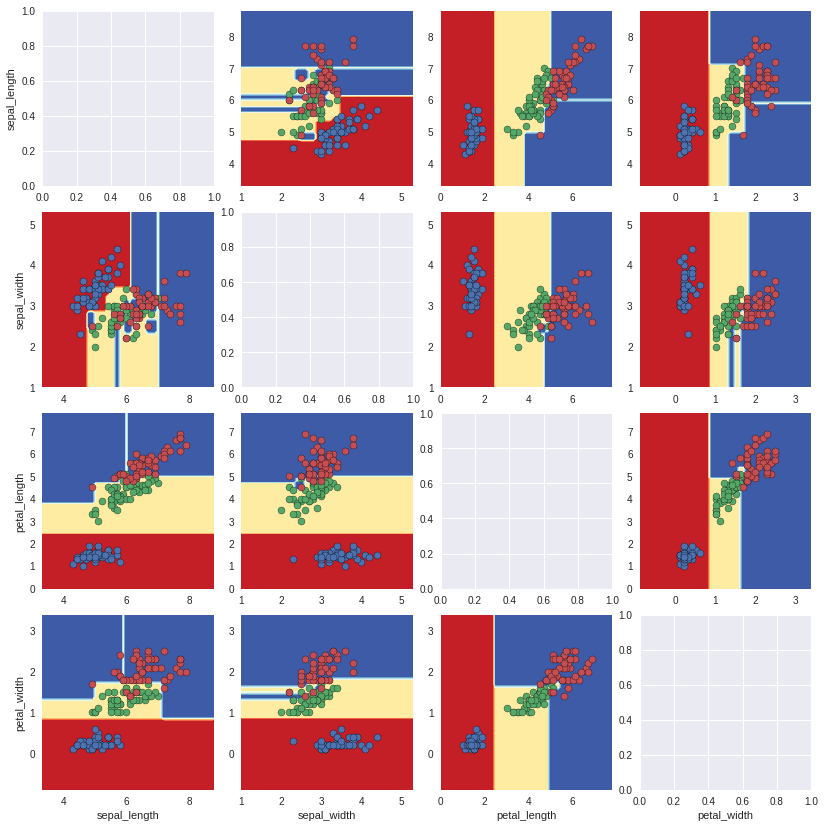

In [0]:
plot_decision_surface(DecisionTreeClassifier, X_iris, Y_iris, 
                      ['sepal_length', 'sepal_width', 
                       'petal_length', 'petal_width'])

# Feature Importances

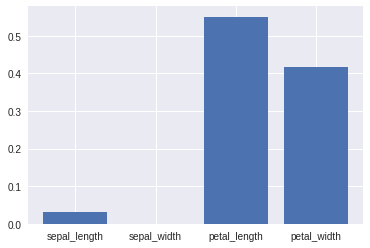

In [0]:
def plot_importance(clf, df):
    plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
    plt.xticks(range(len(clf.feature_importances_)), df.columns)
    
plot_importance(clf, X_train)

# HANDS ON: Training a Random Forest Classifier
![Bundestag](https://www.bundestag.de/image/462008/16x9/598/336/e4f4245308d9f907d264e173cc388a9/uW/plenum_teaser_sitzungsverlauf_bild.jpg)


## The Titanic Data Set
On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. The data set contains 1309 observations, each characterizing an individual passenger. 

The data set has the following axis:
  - survived  
    survival of the individual
  - pclass 	
    passanger class (1 = 1st; 2 = 2nd; 3 = 3rd)
  - name  
    full name of the individual
  - sex 	
  - age  
    age in years as float
  - sibsp 	
    number of siblings/spouses also on the titanic
  - parch 	
    number of parents/children
  - ticket 	
    arbitrary ticket number
  - fare 	
    price paid for the ticket
  - cabin 	
    arbitrary cabin id
  - embarked 	
    port of embarkation
  - boat 	
    life boat id
  - home.dest  
    travel destination


## Task
Your task is to train and evaluate a model to predict if a passenger survived the event.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


def df2numeric(df):
  """ convert non numeric columns to numeric """
  df = df.copy()
  le = preprocessing.LabelEncoder()
  for column, dtype in zip(df.columns, df.dtypes):
    if not np.issubdtype(dtype, np.number):
      df[column] = le.fit_transform(df[column].astype(str))
  return df


# read the data set
fn_titanic = get_file('titanic.csv', 'https://raw.githubusercontent.com/liob/ai-winther-school/master/data/titanic.csv')
df_titanic = read_csv(fn_titanic)

# clean up the data set:
#  - handle nan entries
#  - convert all columns to numeric
df_titanic = df_titanic.fillna(0)
df_titanic = df2numeric(df_titanic)

# create feature vector
X_titanic = df_titanic.drop(['survived'], axis=1)
Y_titanic = df_titanic['survived']

In [0]:
###################
#                 #
# YOUR CODE HERE! #
#                 #
###################









# CAVE: If you have above 90 % accuracy, check for common pitfalls!
# The bug may not be in YOUR code. Check the feature importance.

# HANDS ON BONUS: Try Different Hyper Parameters and Classifiers

try to use different hyper parameters for the random forest classifier. You will find a documenation of viable hyperparameters here:  [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Also try [different types of ensemble classifiers](http://scikit-learn.org/stable/modules/ensemble.html), such as the ExtraTreesClassifier model.